eu tenho um diagrama de blocos seguinte:

bloco 1 = $$k_p\left(\frac{s-k}{s}\right)$$

bloco 2 = $$\frac{\frac{0.9}{62}}{s+\frac{1}{62}}$$

estão ligados em série com um feedback. 

$$G_{F}(s) = \frac{Y(s)}{R(s)} = \frac{0.9kp}{62s^2 + (k+1/62)s + 1.9kp}$$

O polinômio característico é obtido ao igualar o denominador da função de transferência a zero, ou seja:

$$62s^2 + (k+1/62)s + 1.9kp = 0$$

Este é um polinômio do segundo grau em s e pode ser resolvido utilizando a fórmula geral de Bhaskara:

$$s = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}$$

onde a, b e c são os coeficientes do polinômio característico.

Para o caso específico do polinômio característico do sistema com os blocos dados, temos:

$$a = 62$$

$$b = k + \frac{1}{62}$$

$$c = 1.9kp$$

t_i é uma constate e k_p varia de 0 a infinito. O que se está pedindo é construir uma sintonia para esse sistema onde M_p < 20% e t_s <200 s

Para M_p < 20%, devemos ajustar o ganho do controlador (kp) de forma que o polo dominante do sistema em malha fechada esteja localizado no lugar das raízes a uma distância de 20% do eixo real negativo. O lugar das raízes pode ser traçado com a função root_locus da biblioteca Control.

Para t_s < 200s, devemos ajustar o valor de t_i (tempo integral) do controlador, de forma que o polo do sistema em malha fechada esteja localizado em -1/t_i. A constante de tempo t_i pode ser ajustada usando o método de aproximação de aproximação de 2a ordem da resposta ao degrau.

Um possível procedimento para sintonia do controlador é:

    1. Traçar o lugar das raízes do sistema utilizando a função root_locus da biblioteca Control, variando o valor de kp. Encontrar o valor de kp que satisfaz a especificação de sobressinal.

    2. Calcular a posição do polo dominante no lugar das raízes para o valor de kp encontrado em 1. A partir dessa posição, traçar uma linha vertical até o eixo real negativo. O valor da interseção dessa linha com o eixo real negativo é o valor da constante de tempo t_i.

    3. Calcular o valor do ganho k que resulta em um tempo de subida (t_r) igual a 1.8/t_i. O tempo de subida é o tempo que o sistema leva para ir de 10% a 90% do valor final. A partir desse valor de k, calcular o valor de kp correspondente.

    4. Verificar se as especificações de sobressinal e tempo de estabilização são atendidas para os valores de kp e t_i encontrados. Se necessário, ajustar os valores e recalcular os parâmetros.

Vale lembrar que este é apenas um procedimento sugerido e pode haver variações dependendo das características específicas do sistema a ser controlado.


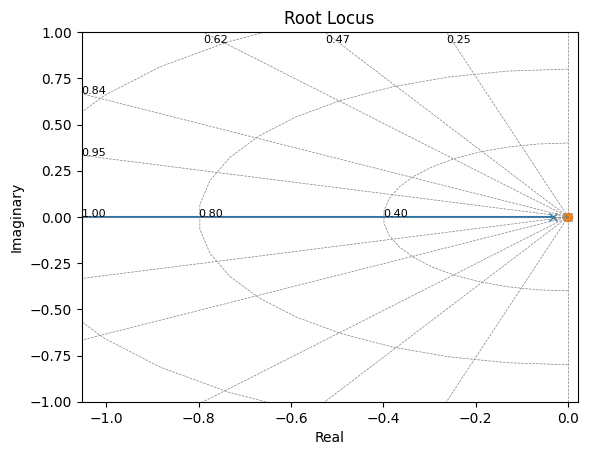

In [20]:
import numpy as np
import control

# Define o polinômio do sistema em malha fechada
kp = 1
k = 2
num = [1.9*kp, 0]
den = [62, (1/62+k), 0]
sys = control.tf(num, den)

# Define os requisitos de desempenho
tp = 2 # tempo de pico desejado
zeta = 0.6 # coeficiente de amortecimento desejado

# Projeta o controlador usando o lugar das raízes
control.root_locus(sys)
plt.show()

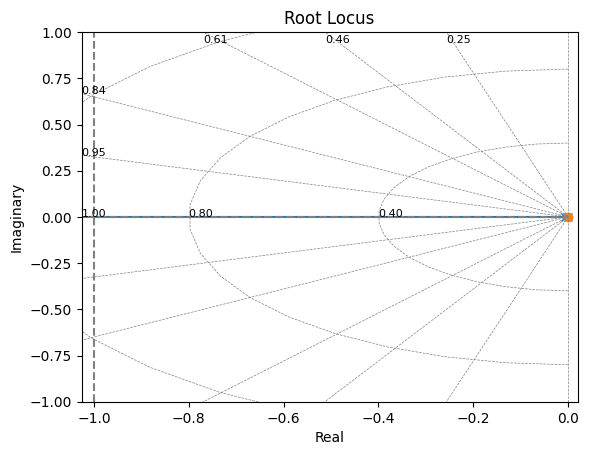

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import control

# Define o polinômio característico
num = [1.9*kp, 0]
den = [62, (1/62+k), 0]
sys = control.TransferFunction(num, den)

# Traça o lugar das raízes
control.root_locus(sys)

# Plota a linha de sobressinal de 20%
plt.plot([-1, -1], [-1, 1], '--', color='grey')

# Plota a linha de tempo de estabilização de 200s
plt.plot([-200, 0], [0, 0], '--', color='grey')

plt.show()

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import control

# Define o polinômio característico
num = [1.9*kp, 0]
den = [62, (1/62+k), 0]

# Cria um objeto transferência
sys = control.TransferFunction(num, den)

# Define os parâmetros do controlador
ti = 0.01
kp = 2

# Cria um objeto controlador PID
Kc = kp
Td = ti
Ti = np.inf
Gc = control.tf(Kc * np.array([Ti*Td, Ti, 1]), np.array([Ti, 0]))

# Cria um sistema de malha fechada
sys_cl = control.feedback(Gc * sys, 1)

# Traça o lugar das raízes
control.root_locus(sys_cl)

# Plota a linha de sobressinal de 20%
plt.plot([-1, -1], [-1, 1], '--', color='grey')

# Plota a linha de tempo de estabilização de 200s
plt.plot([-200, 0], [0, 0], '--', color='grey')

plt.show()


LinAlgError: Array must not contain infs or NaNs